In [3]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Softmax, Dropout

In [4]:
# Import dataset, which is included in tensorflow
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


<class 'numpy.ndarray'>
(28, 28)


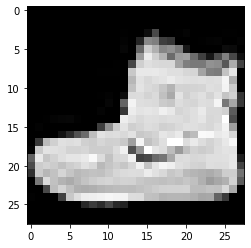

In [5]:
# Examples are 28 x 28 numpy arrays
first_example = x_train[0]
print(type(first_example))
print(first_example.shape)
plt.imshow(first_example, interpolation='nearest', cmap="gray")

In [6]:
# Normalize, shuffle and split training data into dev and training sets
x_train = x_train/255
x_test = x_test/255
x_train, y_train = shuffle(x_train, y_train)
x_dev, y_dev = x_train[0:10000], y_train[0:10000]
x_train, y_train = x_train[10000:60000], y_train[10000:60000]

In [7]:
# Reshape data to work with tf
x_train = x_train.reshape(50000,28,28,1)
x_dev = x_dev.reshape(10000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_dev = to_categorical(y_dev)
y_test = to_categorical(y_test)

In [9]:
# Define model

model = Sequential()
model.add(Conv2D(128, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(256, 3, activation='relu', padding="same"))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(512, 3, activation='relu', padding="same"))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train model
model.fit(x_train, y_train, validation_data=(x_dev, y_dev), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 8ms/step - loss: 0.7366 - accuracy: 0.7384 - val_loss: 0.3322 - val_accuracy: 0.8786
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3382 - accuracy: 0.8793 - val_loss: 0.2751 - val_accuracy: 0.8984
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2747 - accuracy: 0.9008 - val_loss: 0.2722 - val_accuracy: 0.8982
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2519 - accuracy: 0.9070 - val_loss: 0.2380 - val_accuracy: 0.9152
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2208 - accuracy: 0.9172 - val_loss: 0.2345 - val_accuracy: 0.9182
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2028 - accuracy: 0.9237 - val_loss: 0.2288 - val_accuracy: 0.9175
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1887 - accuracy: 0.9290 - val_loss: 0.2204 - val_ac

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2551 - accuracy: 0.9144


[0.25513219833374023, 0.9143999814987183]

Sandal


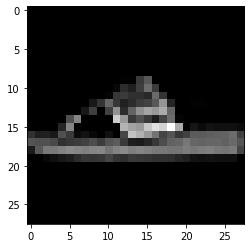

In [59]:
# Test some examples as sanity check
# Rerun for another example

from numpy import squeeze, argmax
from random import randint

n = randint(0,9999)

example = x_test[n]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.imshow(squeeze(example), interpolation='nearest', cmap="gray")
print(class_names[argmax(squeeze(model.predict(example.reshape(1, 28, 28, 1))))])

In [46]:
# Save and download model
!mkdir model
model.save("model/fashionMNISTConvNet")
!zip -r model.zip model
from google.colab import files
files.download('model.zip')

mkdir: cannot create directory ‘model’: File exists


KeyboardInterrupt: ignored

In [12]:
# Accuracy records

# model = Sequential()
# model.add(Conv2D(128, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(256, 3, activation='relu', padding="same"))
# model.add(Dropout(0.2))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(512, 3, activation='relu', padding="same"))
# model.add(Dropout(0.2))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.93
# Overfits after 10 epochs

# model = Sequential()
# model.add(Conv2D(128, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(256, 3, activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(512, 3, activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Epochs: 10
# Val accuracy: 0.91
# Overfitting training data

# model.add(Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(128, 3, activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(256, 3, activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Epochs: 3
# Val accuracy: 0.90

# model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPool2D(pool_size=2))
# model.add(Conv2D(64, 3, activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(128, 3, activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(256, 2, activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.89

# Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1))
# MaxPooling2D((2, 2))
# Conv2D(64, 3, activation='relu')
# MaxPooling2D((2, 2))
# Conv2D(128, 2, activation='relu')
# Flatten()
# Dense(100, activation='relu')
# Dense(10, activation='softmax')
# Val accuracy: 0.89

# model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, 3, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, 2, activation='relu'))
# model.add(Flatten())
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.87

# model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, 3, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, 2, activation='relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.89

# model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, 3, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, 3, activation='relu'))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.89

# model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, 3, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, 2, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.88

# model = Sequential()
# model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, 3, activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, 2, activation='relu'))
# model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.87

# model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(64, 3, activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))
# model.add(Conv2D(128, 2, activation='relu'))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# Val accuracy: 0.88